In [128]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [120]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.font_manager as fm

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats


# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 데이터 불러오기

In [2]:
sale = pd.read_csv("datas/sales.csv", encoding="ANSI")
sale

,Weekday,Date,Month,Time,Con_Time,ViewTime,Mom_Code,Item_Code,Item,Item_Group,Price,Amount,EA
0,화,2019-01-01,1,6,0.250000,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.61
1,화,2019-01-01,1,6,0.250000,20.000000,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.55
2,화,2019-01-01,1,6,0.263889,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.75
3,화,2019-01-01,1,6,0.263889,20.000000,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.31
4,화,2019-01-01,1,6,0.277778,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,수,2020-01-01,1,0,0.013889,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,#DIV/0!
38305,수,2020-01-01,1,0,0.027778,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,#DIV/0!
38306,수,2020-01-01,1,1,0.041667,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN,#DIV/0!
38307,수,2020-01-01,1,1,0.055556,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN,#DIV/0!


## 결측치 분포 확인

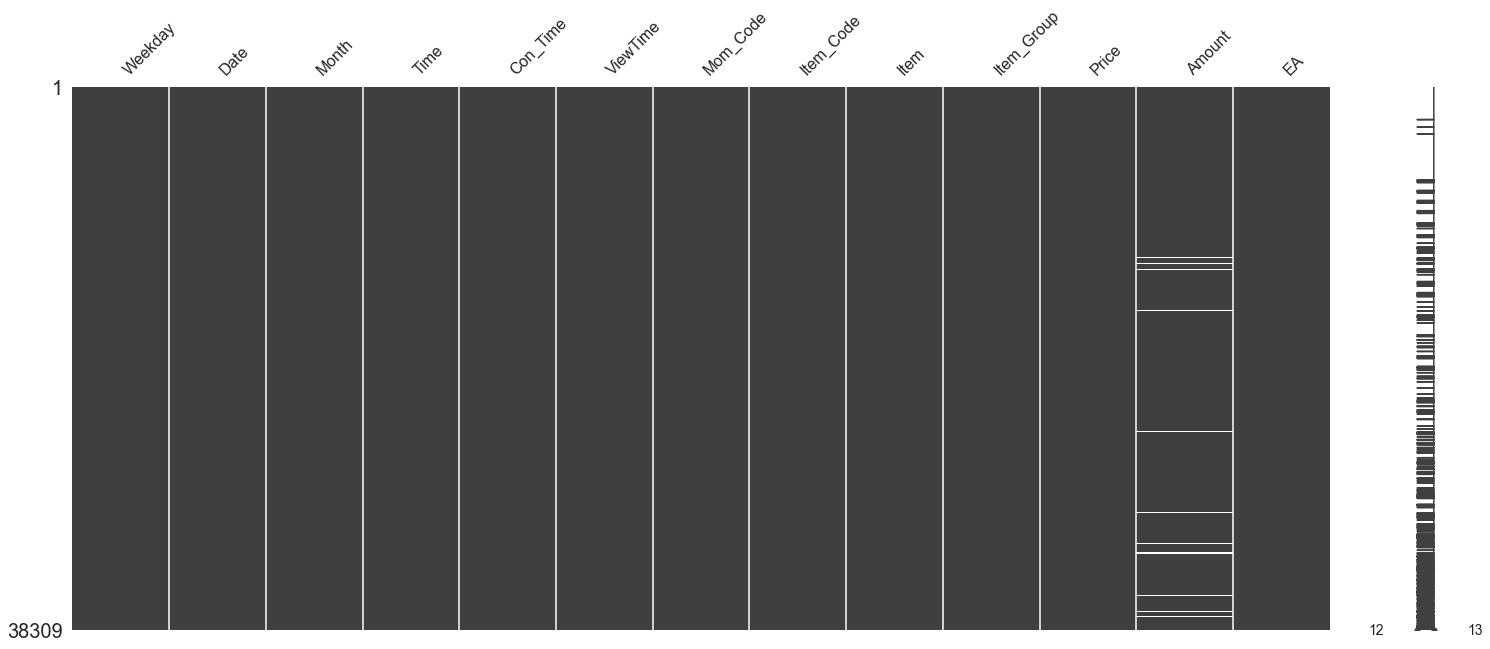

In [3]:
import missingno as msno

msno.matrix(sale)
plt.show()

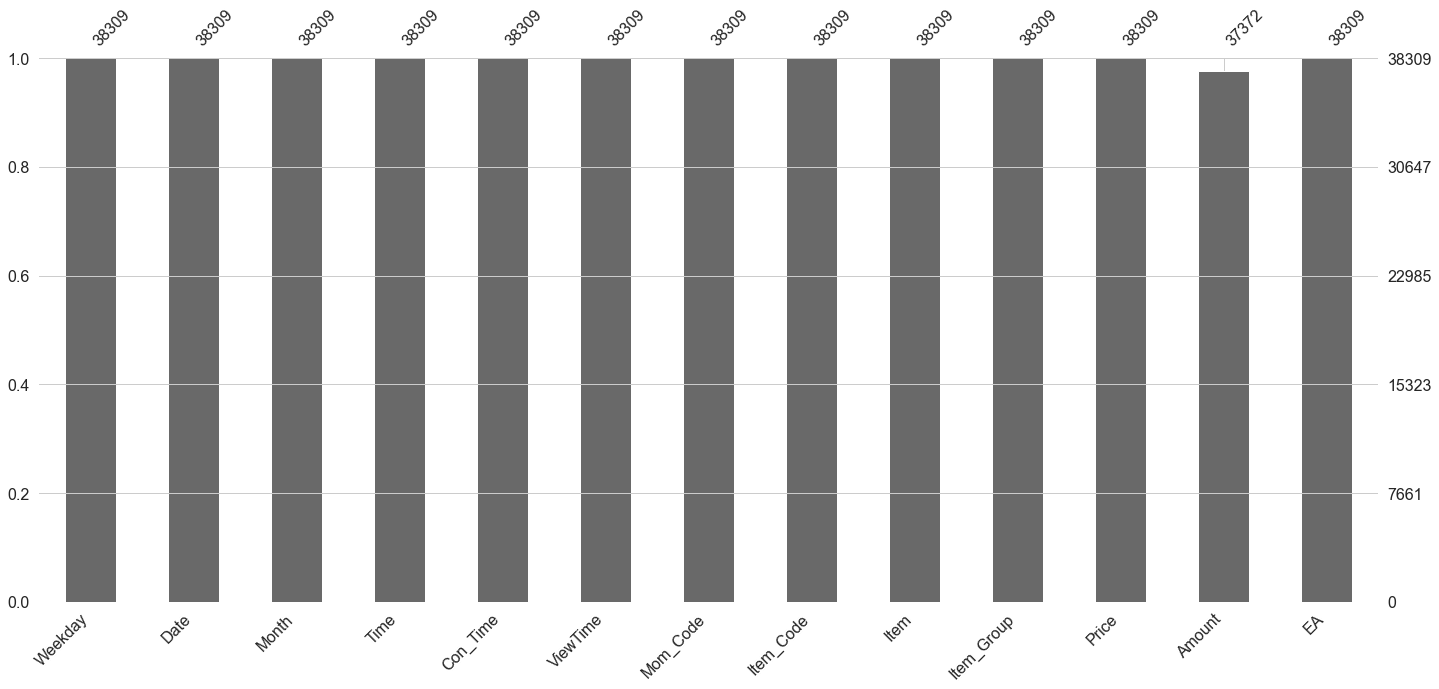

In [4]:
msno.bar(sale)
plt.show()

## 결측치 제거(참고사항 참고)

In [5]:
sale.dropna(inplace=True)


In [6]:
sale['Price']

0         39900
1         39900
2         39900
3         39900
4         39900
          ...  
38299    148000
38300    178000
38301    168000
38302    158000
38303    148000
Name: Price, Length: 37372, dtype: int64

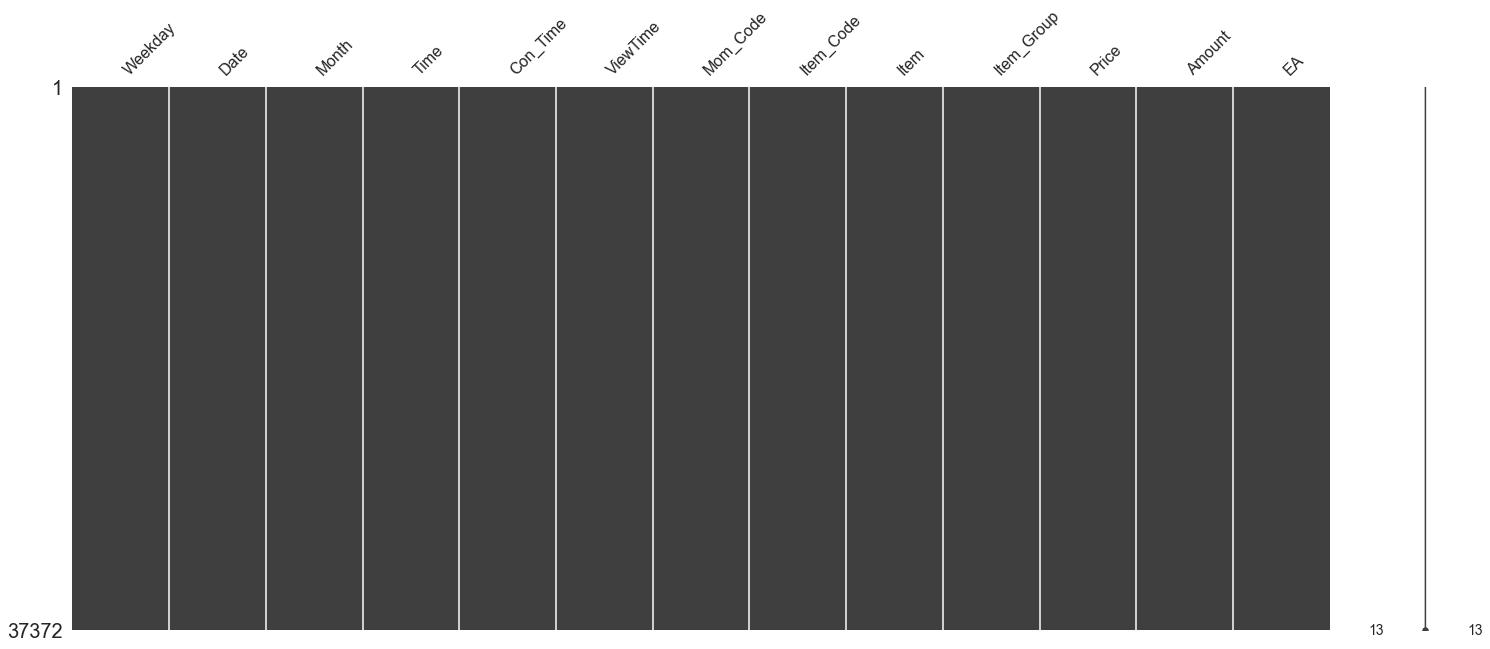

In [7]:
msno.matrix(sale)
plt.show()

### 가격 분포

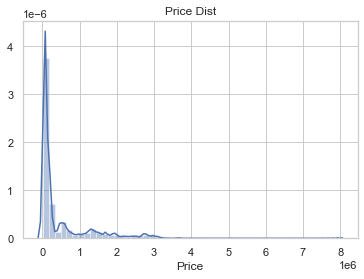

In [8]:
sns.distplot(sale.Price)
plt.title("Price Dist")
plt.show()

### 취급액 분포

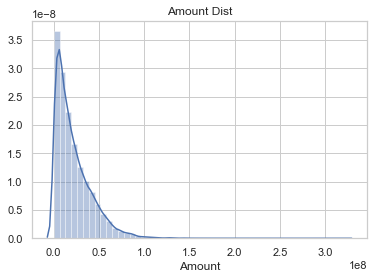

In [9]:
sns.distplot(sale.Amount)
plt.title("Amount Dist")
plt.show()

In [10]:
sale.groupby(sale.Mom_Code).Amount.median()

Mom_Code
100000    11983000.0
100001    38607500.0
100002    36441000.0
100006     8931500.0
100009    32271000.0
             ...    
100843    12386500.0
100844    35031000.0
100845     4590500.0
100846    12486500.0
100849    46506000.0
Name: Amount, Length: 687, dtype: float64

In [11]:
sale.groupby(sale.Item_Group).Amount.median()

Item_Group
가구       7372000.0
가전       9432000.0
건강기능    22828000.0
농수축     40595000.0
생활용품    12280000.0
속옷      20618000.0
의류      19684000.0
이미용     33554000.0
잡화      11829000.0
주방      13544000.0
침구       8974000.0
Name: Amount, dtype: float64

### 마더코드별 취급액 분포

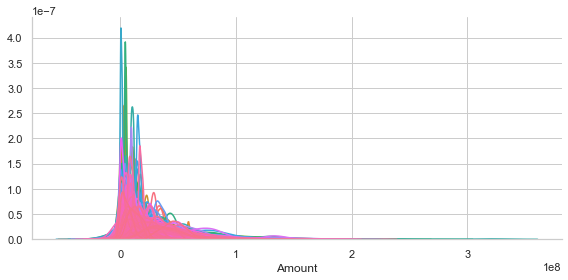

In [12]:
g = sns.FacetGrid(sale, hue="Mom_Code", height=4, aspect=2)
g.map(sns.kdeplot, "Amount")
plt.show()

### 상품군별 취급액 분포

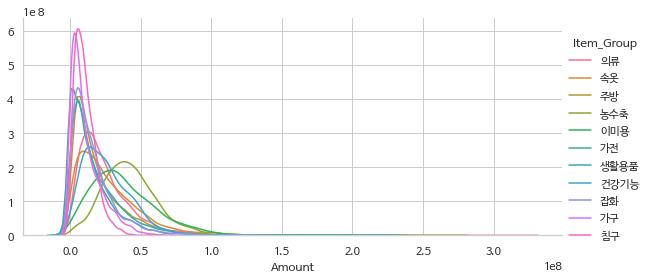

In [133]:
g = sns.FacetGrid(sale, hue="Item_Group", height=4, aspect=2)
g.map(sns.kdeplot, "Amount").add_legend()
plt.show()

### 요일별 취급액 분포

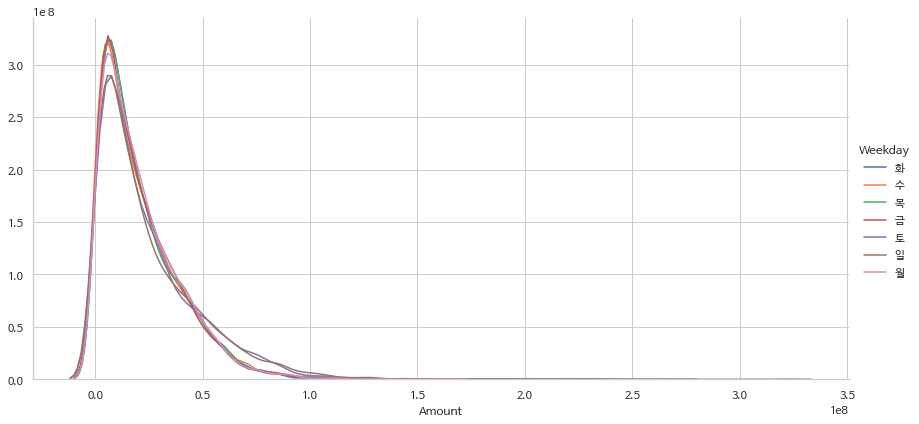

In [130]:
g = sns.FacetGrid(sale, hue="Weekday", height=6, aspect=2)
g.map(sns.kdeplot, "Amount").add_legend()
plt.show()

In [ ]:
### 시간별 취급액 분포

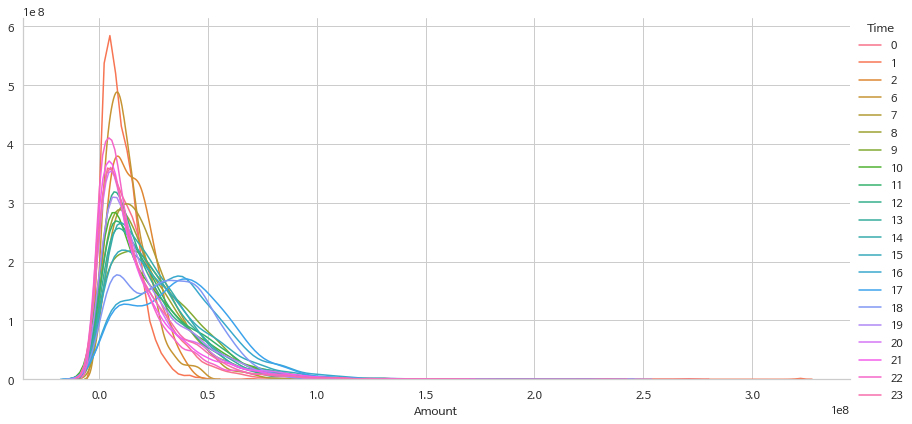

In [136]:
g = sns.FacetGrid(sale, hue="Time", height=6, aspect=2)
g.map(sns.kdeplot, "Amount").add_legend()
plt.show()

### 요일별 가격 분포

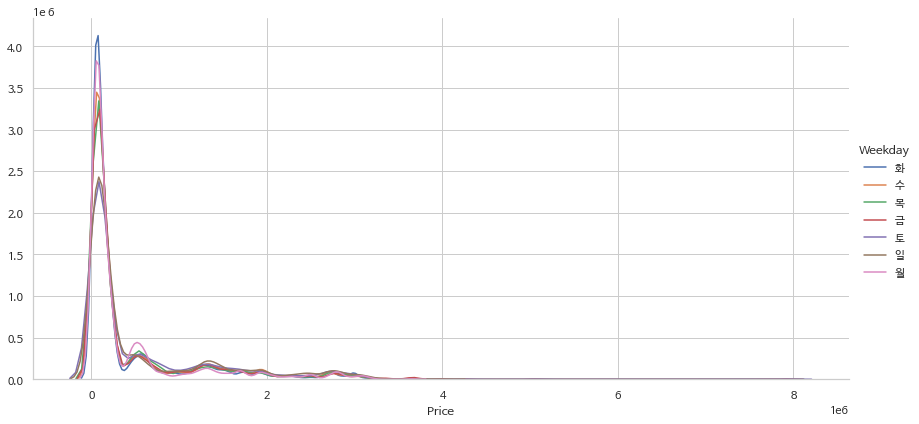

In [131]:
g = sns.FacetGrid(sale, hue="Weekday", height=6, aspect=2)
g.map(sns.kdeplot, "Price").add_legend()
plt.show()

### 시간별 가격 분포

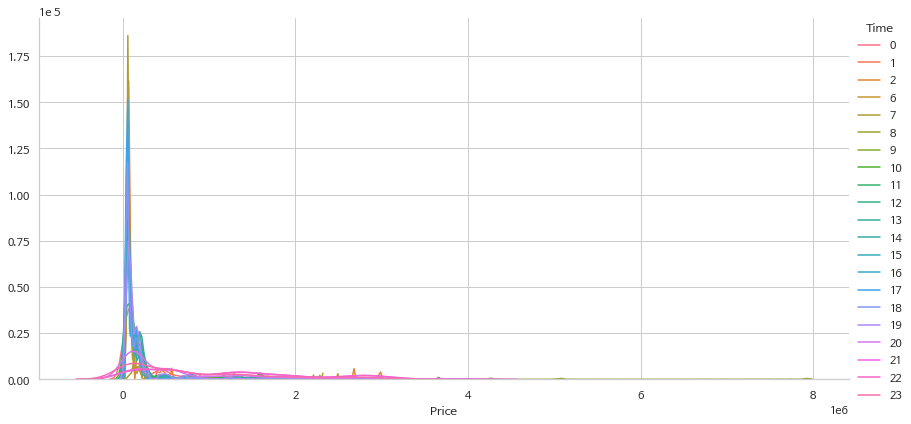

In [134]:
g = sns.FacetGrid(sale, hue="Time", height=6, aspect=2)
g.map(sns.kdeplot, "Price").add_legend()
plt.show()

In [14]:
from patsy import *
dmatrix("Item_Group", sale)

DesignMatrix with shape (37372, 11)
  Columns:
    ['Intercept',
     'Item_Group[T.가전]',
     'Item_Group[T.건강기능]',
     'Item_Group[T.농수축]',
     'Item_Group[T.생활용품]',
     'Item_Group[T.속옷]',
     'Item_Group[T.의류]',
     'Item_Group[T.이미용]',
     'Item_Group[T.잡화]',
     'Item_Group[T.주방]',
     'Item_Group[T.침구]']
  Terms:
    'Intercept' (column 0), 'Item_Group' (columns 1:11)
  (to view full data, use np.asarray(this_obj))

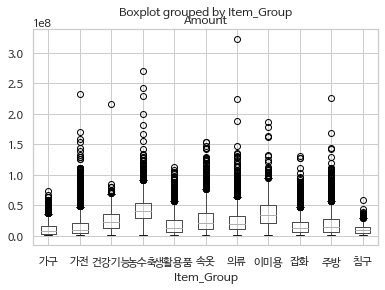

In [132]:
sale.boxplot("Amount", "Item_Group")
plt.show()

In [16]:
model = sm.OLS.from_formula("Amount ~ C(Item_Group) + 0", sale)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     933.4
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        15:54:06   Log-Likelihood:            -6.7749e+05
No. Observations:               37372   AIC:                         1.355e+06
Df Residuals:                   37361   BIC:                         1.355e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Item_Group)[가구]    1.115e+07   3

In [17]:
sale.describe().iloc[:]

,Month,Time,Con_Time,ViewTime,Mom_Code,Item_Code,Price,Amount
count,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,37372.000000,3.737200e+04,3.737200e+04
mean,6.463261,14.308493,0.610125,20.384028,100389.497726,201211.879081,4.680006e+05,2.187305e+07
std,3.374649,6.620608,0.276197,3.121860,251.374951,737.824966,7.314484e+05,2.019140e+07
min,1.000000,0.000000,0.000000,2.466667,100000.000000,200000.000000,1.280000e+04,5.000000e+04
25%,4.000000,10.000000,0.416667,20.000000,100153.000000,200539.000000,5.900000e+04,6.880750e+06
50%,6.000000,15.000000,0.625000,20.000000,100346.000000,201160.000000,1.099000e+05,1.612950e+07
75%,9.000000,21.000000,0.875000,20.000000,100597.000000,201863.000000,5.090000e+05,3.163125e+07
max,12.000000,23.000000,0.993056,40.000000,100849.000000,202513.000000,7.930000e+06,3.220090e+08


In [59]:
feature_names = list(sale.columns[10:13])
feature_names = ["scale({})".format(name) for name in feature_names] + list(sale.columns[0:10])
feature_names

['scale(Price)',
 'scale(Amount)',
 'scale(EA)',
 'Weekday',
 'Date',
 'Month',
 'Time',
 'Con_Time',
 'ViewTime',
 'Mom_Code',
 'Item_Code',
 'Item',
 'Item_Group']

In [139]:
model1 = sm.OLS.from_formula("scale(Amount) ~ " + "+".join(feature_names[:1]), data=sale)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:          scale(Amount)   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     2460.
Date:                Tue, 11 Aug 2020   Prob (F-statistic):               0.00
Time:                        19:09:29   Log-Likelihood:                -51837.
No. Observations:               37372   AIC:                         1.037e+05
Df Residuals:                   37370   BIC:                         1.037e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -7.14e-15      0.005  -1.42e-12   

In [140]:
model2 = sm.OLS.from_formula("scale(Amount) ~ C(Weekday) + 0", sale)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:          scale(Amount)   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     32.52
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.62e-39
Time:                        19:09:36   Log-Likelihood:                -52931.
No. Observations:               37372   AIC:                         1.059e+05
Df Residuals:                   37365   BIC:                         1.059e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(Weekday)[금]    -0.0532      0.014     -3.849

### 각 데이터의 레버리지 값

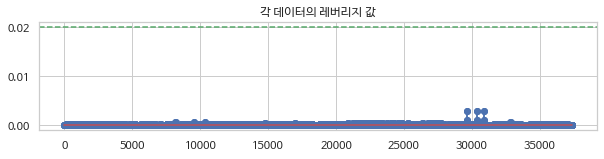

In [142]:
influence = result1.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터의 레버리지 값")
plt.show()

### 각 데이터의 표준화 잔차

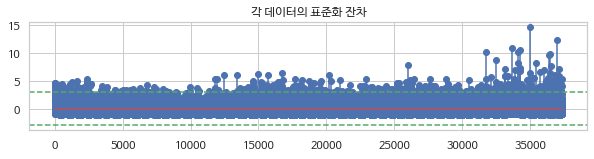

In [144]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터의 표준화 잔차")
plt.show()

### Cook's distance를 버블 크기로 표시

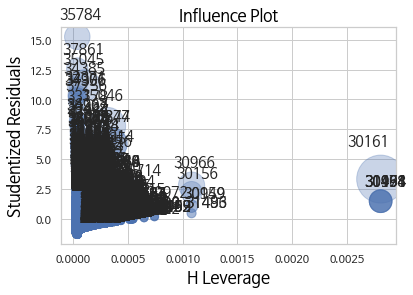

In [145]:
sm.graphics.influence_plot(result1, plot_alpha=0.3)
plt.show()